# Decision Tree

In [61]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [62]:
data = pd.read_csv('tennis.csv')

In [63]:
data_df = pd.DataFrame(data)

data_df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [64]:
data_df.drop('day', axis=1, inplace=True)

In [65]:
data_df.drop('temp', axis=1, inplace=True)

In [66]:
data_df

,outlook,humidity,wind,play
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Weak,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Strong,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,Normal,Weak,Yes


In [67]:
from sklearn.preprocessing import LabelEncoder

outlook=LabelEncoder()
humidity=LabelEncoder()
wind=LabelEncoder()
play=LabelEncoder()


In [68]:
data_df['outlook']=outlook.fit_transform(data_df['outlook'])
data_df['humidity']=outlook.fit_transform(data_df['humidity'])
data_df['wind']=outlook.fit_transform(data_df['wind'])
data_df['play']=outlook.fit_transform(data_df['play'])

In [69]:
data_df

,outlook,humidity,wind,play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,0,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [70]:
features_col = ["outlook" , "humidity" , "wind"]
x = data_df[features_col]
y = data_df.play

In [71]:
x

,outlook,humidity,wind
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,0
7,2,0,1
8,2,1,1
9,1,1,1


In [72]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2)

In [74]:
x_train

,outlook,humidity,wind
7,2,0,1
1,2,0,0
10,2,1,0
0,2,0,1
12,0,1,1
13,1,0,0
9,1,1,1
3,1,0,1
4,1,1,1
6,0,1,0


In [75]:
x_test

,outlook,humidity,wind
2,0,0,1
11,0,0,0
5,1,1,0


In [76]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini')

In [77]:
classifier.fit(x_train , y_train)

DecisionTreeClassifier()

In [78]:
classifier.predict(x_test)

array([1, 0, 1])

In [79]:
x_test  # 0 no    ,    1 yes   &&&      outlook[sunny 2 , overcast 0 , rainy 1] 

,outlook,humidity,wind
2,0,0,1
11,0,0,0
5,1,1,0


[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.625, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.3333333333333333, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

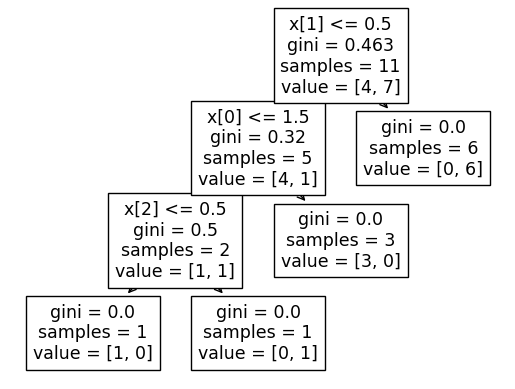

In [83]:
from sklearn import tree
tree.plot_tree(classifier)

# Decision Tree --- By Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mdaza\AppData\Local\Temp\ipykernel_18816\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df['sex'] = df['sex'].map({'Female' : 1 , 'Male' : 2})

In [7]:
df['smoker'] = df['smoker'].map({'Yes' : 1 , 'No' : 2})

In [8]:
x = df[['total_bill' , 'sex']]
y = df['smoker']

In [9]:
x , y

(     total_bill sex
 0         16.99   1
 1         10.34   2
 2         21.01   2
 3         23.68   2
 4         24.59   1
 ..          ...  ..
 239       29.03   2
 240       27.18   1
 241       22.67   2
 242       17.82   2
 243       18.78   1
 
 [244 rows x 2 columns],
 0      2
 1      2
 2      2
 3      2
 4      2
       ..
 239    2
 240    1
 241    1
 242    2
 243    2
 Name: smoker, Length: 244, dtype: category
 Categories (2, int64): [1, 2])

In [30]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

# Grid SearchCV

In [32]:
data = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
}


from sklearn.model_selection import GridSearchCV

gd = GridSearchCV(DecisionTreeClassifier() , param_grid = data)


gd.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [33]:
gd.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'log_loss' , splitter = 'random')

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', splitter='random')

In [35]:
dt.score(X_train, y_train) * 100 , dt.score(X_test, y_test) * 100 

(97.94871794871794, 48.97959183673469)